In [217]:
import numpy as np
import pandas as pd
import random
import nltk
import string

nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, plot_precision_recall_curve



import matplotlib
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [143]:
df = pd.read_csv('Downloads/labeled.csv')

In [144]:
df['toxic'] = df['toxic'].apply(int)

In [145]:
train, test = train_test_split(df, test_size = 500, shuffle = True, random_state = 42 )

In [146]:
train.shape

(13912, 2)

In [147]:
test.shape

(500, 2)

In [148]:
df['toxic'].value_counts()

0    9586
1    4826
Name: toxic, dtype: int64

In [149]:
for c in df[df['toxic'] ==0]['comment'].tail():
    print(c)

ТАСС, 21 марта. Премьер-министр Новой Зеландии Джасинда Ардерн ввела в четверг запрет на оборот и эксплуатацию штурмовых и полуавтоматических винтовок на территории страны. Об этом говорится в официальном заявлении, распространенном в четверг и опубликованном на сайте новозеландского правительства. В понедельник, через 72 часа после ужасного террористического акта в Крайстчерче кабинет министров согласился пересмотреть закон. Теперь, через шесть дней после этого нападения, мы объявляем о запрете на все полуавтоматические и штурмовые винтовки военного образца в Новой Зеландии , - говорится в заявлении. Все виды полуавтоматического оружия, которые были использованы во время теракта в пятницу, 15 марта, будут запрещены . Отмечается, что под запрет также попадут приспособления, с помощью которых можно переделать оружие в полуавтоматическое военного образца, и магазины большой емкости. Помимо этого, кабинет министров поручил разработать схему выкупа оружия подобного типа у его владельцев. И

In [150]:
test['toxic'].value_counts()

0    332
1    168
Name: toxic, dtype: int64

In [151]:
train['toxic'].value_counts()

0    9254
1    4658
Name: toxic, dtype: int64

In [152]:
sentence_example = df.iloc[1]['comment']
tokens = word_tokenize(sentence_example, language = 'russian')
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
russian_stop_words = stopwords.words('russian')
tokens_without_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in russian_stop_words]
snowball = SnowballStemmer(language = 'russian')
stemmed_tokens = [snowball.stem(i) for i in tokens_without_stop_words_and_punctuation]


In [153]:
print(f'Комментарий:{sentence_example}')
print('----------------------------------')
print(f'Токены:{tokens}')
print('----------------------------------')
print(f'Без пунктуации:{tokens_without_punctuation}')
print('----------------------------------')
print(f'Без пунктуации и стоп-слов:{tokens_without_stop_words_and_punctuation}')
print('----------------------------------')
print(f'После стемминга:{stemmed_tokens}')
print('----------------------------------')

Комментарий:Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

----------------------------------
Токены:['Хохлы', ',', 'это', 'отдушина', 'затюканого', 'россиянина', ',', 'мол', ',', 'вон', ',', 'а', 'у', 'хохлов', 'еще', 'хуже', '.', 'Если', 'бы', 'хохлов', 'не', 'было', ',', 'кисель', 'их', 'бы', 'придумал', '.']
----------------------------------
Без пунктуации:['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'а', 'у', 'хохлов', 'еще', 'хуже', 'Если', 'бы', 'хохлов', 'не', 'было', 'кисель', 'их', 'бы', 'придумал']
----------------------------------
Без пунктуации и стоп-слов:['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'хохлов', 'хуже', 'Если', 'хохлов', 'кисель', 'придумал']
----------------------------------
После стемминга:['хохл', 'эт', 'отдушин', 'затюкан', 'россиянин', 'мол', 'вон', 'хохл', 'хуж', 'есл', 'хохл', 'кисел', 'придума']
---------------------------

In [154]:
snowball = SnowballStemmer (language = 'russian')
russian_stop_words = stopwords.words('russian')

def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language = 'russian')
    tokens = [i for i  in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

In [155]:
vectorizer = TfidfVectorizer(tokenizer = lambda x: tokenize_sentence(x, remove_stop_words = True))
features = vectorizer.fit_transform(train['comment'])

In [160]:
model = LogisticRegression(random_state = 42)
model.fit(features, train['toxic'])


LogisticRegression(random_state=42)

In [170]:
model.predict(features[2])

array([1], dtype=int64)

In [169]:
train['comment'].iloc[2]

'Н е сказал бы: понася могут ругать как пиздоболы, так и нет. А вот если человек хвалит Понася - тут к гадалке не ходи: либо дурак, либо пиздобол.\n'

In [174]:
model_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer = lambda x: tokenize_sentence(x, remove_stop_words = True))),
    ('model', LogisticRegression(random_state = 42) )
])

In [175]:
model_pipeline.fit(train['comment'], train['toxic'])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x0000022E83D37280>)),
                ('model', LogisticRegression(random_state=42))])

In [197]:
model_pipeline.predict(['Привет, друг'])

array([0], dtype=int64)

In [205]:
precision_score(y_true = test['toxic'], y_pred = model_pipeline.predict(test['comment']))

0.9166666666666666

In [207]:
recall_score(y_true = test['toxic'], y_pred = model_pipeline.predict(test['comment']))

0.6547619047619048

In [223]:
prec, rec, threshholds = precision_recall_curve(y_true = test['toxic'], probas_pred = model_pipeline.predict_proba(test['comment'])[:, 1] )

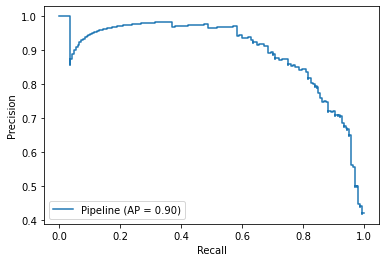

In [224]:
plot_precision_recall_curve(estimator = model_pipeline, X = test['comment'], y = test['toxic'])

In [226]:
np.where(prec > 0.9)

(array([274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
        287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
        300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
        313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
        326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
        339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
        352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
        365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
        378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390,
        395, 396, 397, 398, 399, 400, 401], dtype=int64),)

In [233]:
threshholds[274]

0.4870256563355205

In [235]:
precision_score(y_true = test['toxic'], y_pred = model_pipeline.predict_proba(test['comment'])[:,1] > threshholds[274])

0.9126984126984127

In [236]:
recall_score(y_true = test['toxic'], y_pred = model_pipeline.predict_proba(test['comment'])[:,1] > threshholds[274])

0.6845238095238095